###mra503

### FGSM based untargeted attacks: Your first goal to implement FGSM based untargeted attacks using images from the test set on the baseline DNN. That is, your goal is to adversarially perturb each image in the test set using the following values of parameter ε = {1, 5, 10, 20, 30, 40, 50}. Report the success rate of your attack, i.e., the fraction of test images that were correctly classified by the baseline DNN that are mis-classified after adversarial perturbation, as a function of ε. 

In [1]:
import tensorflow as tf

First extracting the data (copying code from example collab)

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax')
])
predictions = model(x_train[:1]).numpy()
predictions

array([[0.08927566, 0.09786558, 0.08823001, 0.09601588, 0.14342542,
        0.07412779, 0.12212931, 0.11680989, 0.10235924, 0.06976122]],
      dtype=float32)

In [4]:
tf.nn.softmax(predictions).numpy()

array([[0.09891085, 0.09976415, 0.09880748, 0.09957978, 0.10441452,
        0.09742385, 0.1022144 , 0.10167213, 0.10021346, 0.09699937]],
      dtype=float32)

Because of disadv. we are using Sparse Categorical Cross entropy

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
loss_fn(y_train[:1], predictions).numpy()

2.328684

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5859 - accuracy: 0.8906
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5241 - accuracy: 0.9431
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5104 - accuracy: 0.9548
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5028 - accuracy: 0.9621
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4973 - accuracy: 0.9666


In [11]:
ModelAccu=model.evaluate(x_test,  y_test, verbose=2)
print(y_test.shape)
print(x_test.shape)
print(ModelAccu)

313/313 - 0s - loss: 1.4939 - accuracy: 0.9689
(10000,)
(10000, 28, 28)
[1.493942141532898, 0.9689000248908997]


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(modelname,x_test, input_label):
  input_image=tf.convert_to_tensor(x_test)
  input_label = to_categorical(input_label)
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = modelname(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad
e= [1/255, 5/255, 10/255, 20/255, 30/255, 40/255, 50/255]
'''
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (28, 28))
  #image = image[None, ...]
  return image'''
from keras.utils import to_categorical

# make the model and load the training dataset.

#y_test = to_categorical(y_test)

In [14]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
x_test[0].shape
def display_images(modeln,image, description):
  ADVconfidence = modeln.predict(image)
  modeln.evaluate(image,  description, verbose=2)
  #for ia in range(len(ADVconfidence)):
  for ia in range(0,10):
    # Just displaying 10 images
    plt.figure()
    plt.imshow(image[ia])
    plt.title(' \n Number is {} and after Adversarial attack it is labbeled as {} '.format(str(description[ia]), np.argmax(ADVconfidence[ia]*100)))
    plt.show()

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)
AAA
313/313 - 0s - loss: 1.5001 - accuracy: 0.9624


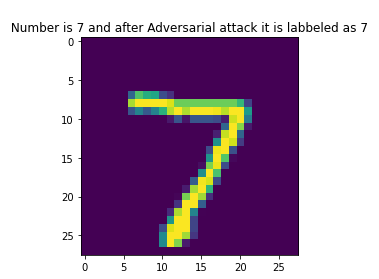

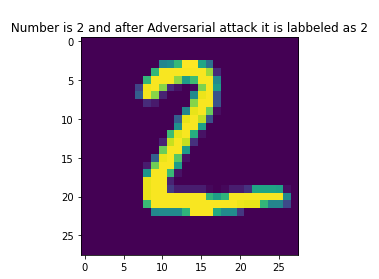

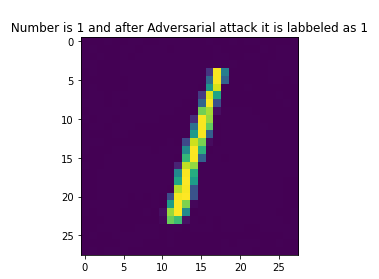

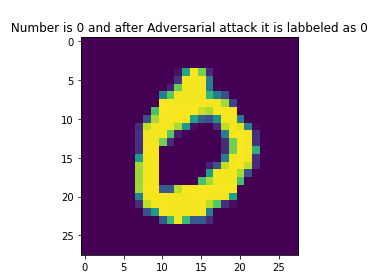

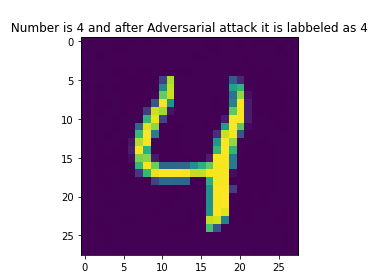

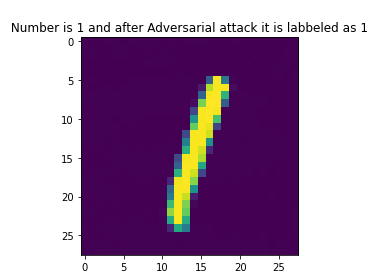

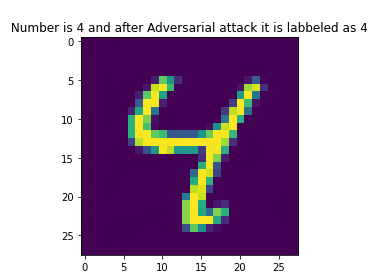

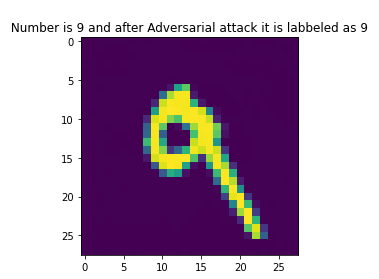

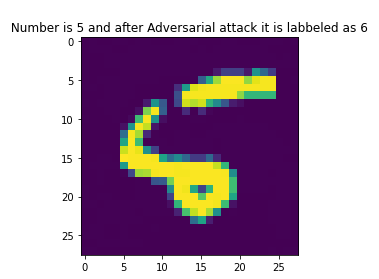

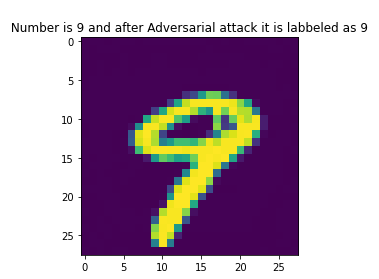

7


In [15]:

print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)
print("AAA")
#y_test=
perturbations=create_adversarial_pattern(model,x_test, y_test)
adv_x_test=[]
for i, eps in enumerate(e):
  #print(x_test.shape)
  
  img_tensor=tf.convert_to_tensor(x_test)
  #print(img_tensor.shape)
  #print(perturbations.shape)
  adv_x = img_tensor + eps*perturbations
  #print(adv_x.shape)
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  adv_x_test.append(adv_x)

#print(len(adv_x_test)) Length is 7
#for ii in range(len(adv_x_test)):
for ii in range(0,1):
  display_images(model,adv_x_test[ii], y_test)
  print(len(adv_x_test))


(10000,)
(10000, 28, 28)
313/313 [==============================] - 0s 1ms/step - loss: 2.1139 - accuracy: 0.3432


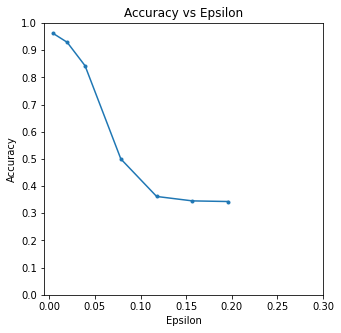

In [16]:
print(y_test.shape)
print(adv_x_test[0].shape)
advAccu=[]
for advimg in adv_x_test:
  MetricsDict=model.evaluate(advimg,y_test,return_dict=True)
  advAccu.append(MetricsDict['accuracy'])
plt.figure(figsize=(5,5))
plt.plot(e, advAccu, ".-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

So original accuracy (Un attacked is 96.9%) No successrate is any amount that decreased accuracy 

0.9689000248908997
[0.6708644395770156, 4.107755893486767, 13.025081749530695, 48.41573085203143, 62.658687596679144, 64.34100696720391, 64.57838896443623]


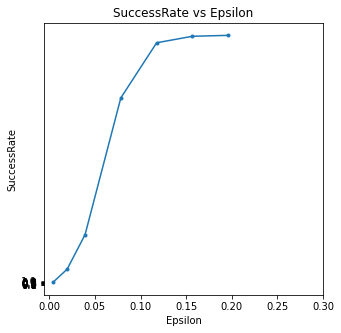

In [21]:
successRate=[]
print(ModelAccu[1])
for i in advAccu:
  #print(i)
  successRate.append((ModelAccu[1]*100-i*100)/ModelAccu[1])
print(successRate)
plt.figure(figsize=(5,5))
plt.plot(e, successRate, ".-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("SuccessRate vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("SuccessRate")
plt.show()

###FGSM based targeted attacks: Next, you will repeat Step 1 above, except this time perform targeted attacks where digit i is classified as (i+1)%10 on the baseline DNN. (Here, i refers to the true ground-truth label of the test images, and you can assume that the attacker has access to these labels.) As before, use the following values of the parameter ε = {1, 5, 10, 20, 30, 40, 50}. Report the attack’s success rate as a function of parameter ε, where success rate is defined as the fraction of test images that were that were correctly classified by the baseline DNN that are mis-classified after adversarial perturbations with label (i+1)%10.

In [23]:
Tmodel = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = Tmodel(x_train[:1]).numpy()
predictions

array([[-0.08997145,  0.49247104, -0.12096274,  0.293384  ,  0.52045846,
         0.05179839, -1.029525  ,  0.20719877,  0.29431307, -0.65530795]],
      dtype=float32)

In [30]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
Tmodel.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
Tmodel.fit(x_train, y_train, epochs=5)
Tmodelaccu=Tmodel.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0475 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9865
313/313 - 0s - loss: 0.0785 - accuracy: 0.9792


In [25]:
Tmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


313/313 - 0s - loss: 0.0707 - accuracy: 0.9788


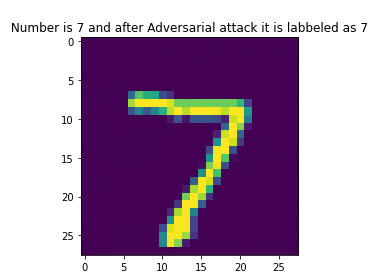

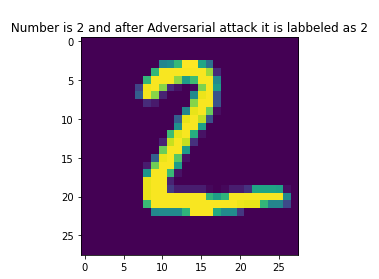

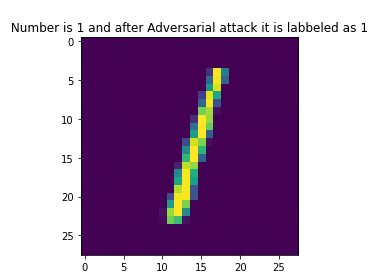

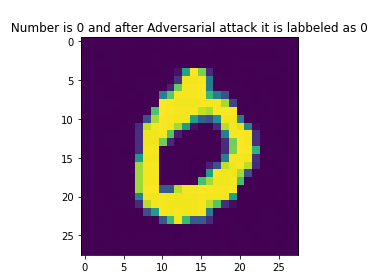

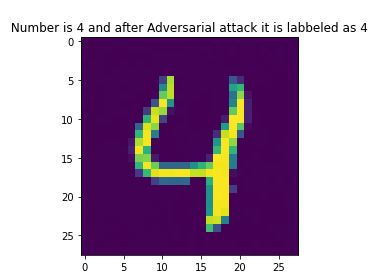

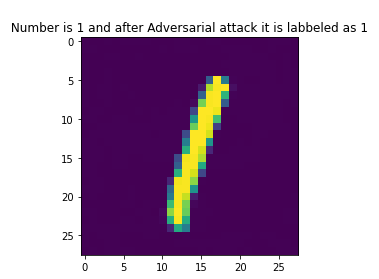

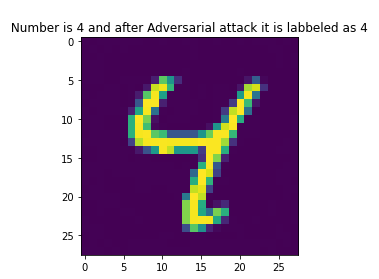

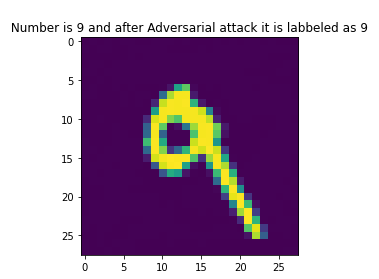

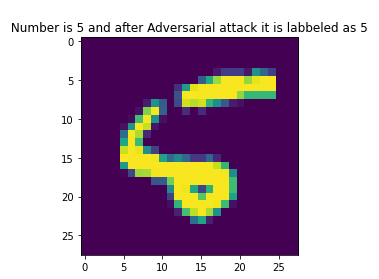

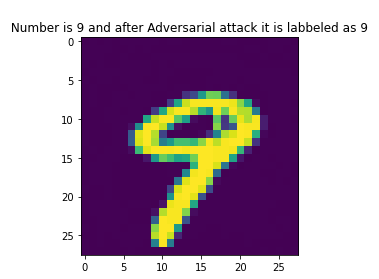

7


In [26]:
def modd(x):
  return (x+1)%10
moddV=np.vectorize(modd)
ya_test=moddV(y_test)

Targetperturbations=create_adversarial_pattern(Tmodel,x_test,ya_test)
Tadv_x_test=[]
for i, eps in enumerate(e):
  #print(x_test.shape)
  
  img_tensor=tf.convert_to_tensor(x_test)
  #print(img_tensor.shape)
  #print(perturbations.shape)
  Tadv_x = img_tensor - eps*Targetperturbations
  #print(adv_x.shape)
  Tadv_x = tf.clip_by_value(Tadv_x, 0, 1)
  Tadv_x_test.append(Tadv_x)

for ii in range(0,1):
  display_images(Tmodel,Tadv_x_test[ii], y_test)
  print(len(Tadv_x_test))


(10000,)
(10000, 28, 28)
313/313 [==============================] - 0s 1ms/step - loss: 1.5429 - accuracy: 0.6175


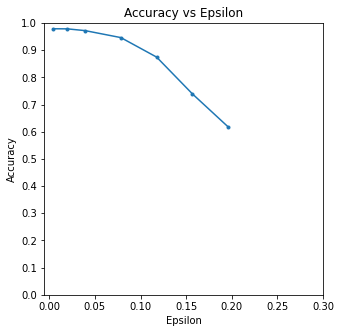

In [27]:
print(y_test.shape)
print(Tadv_x_test[0].shape)
TadvAccu=[]
for Tadvimg in Tadv_x_test:
  TMetricsDict=Tmodel.evaluate(Tadvimg,y_test,return_dict=True)
  TadvAccu.append(TMetricsDict['accuracy'])
plt.figure(figsize=(5,5))
plt.plot(e, TadvAccu, ".-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

[0.04085036446365255, 0.0714866160424878, 0.7352943861945125, 3.3598831281481596, 10.692404851399267, 24.52001886993441, 36.9383166192382]


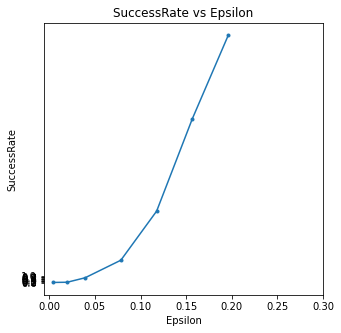

In [31]:
TsuccessRate=[]
for i in TadvAccu:
  #print(i)
  TsuccessRate.append((Tmodelaccu[1]*100-i*100)/Tmodelaccu[1])
print(TsuccessRate)
plt.figure(figsize=(5,5))
plt.plot(e, TsuccessRate, ".-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("SuccessRate vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("SuccessRate")
plt.show()